# Assignment-  Advance Regression
#####  ~Kiran Sumit Dalmiya

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.


In [214]:
#import the libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [215]:
#reading  the file 

df=pd.read_csv('train.csv')
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [216]:
#get shape of dataframe
df.shape

(1460, 81)

In [217]:
#get model description of dataframe
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [218]:
#checking and understanding all the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling null & missing values

In [219]:

#Sum of null value
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [220]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Columns'
null

Null %
Columns              
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
GrLivArea        0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
BsmtFullBath     0.00
HeatingQC        0.00
LowQualFinSF     0.00
LandSlope        0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LotConfig        0.00
YearBuilt        0.00
Utilities        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
MSZoning         0.00
OverallCond      0.00
YearRemodAdd     0.00
2ndFlrSF         0.00
BsmtFinSF2       0.00
1stFlrSF         0.00
CentralAir       0.00
MSSubClass       0.00
Heating          0.00
TotalBsmtSF      0.00
BsmtUnfSF        0.00
BsmtFinSF1       0.00
RoofStyle        0.00
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
SalePrice        0.00

In [221]:
# Its resonable to drop the 'PoolQC','MiscFeature','Alley','Fence','MasVnrType' column because there are so many missing values 
# we will also drop id column as it is unnecessary for our analysis
df = df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType'],axis=1)

In [222]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0             60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2    2008       WD        Normal     208500
1             20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5    2007       WD        Normal     181500
2             60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9    2008       WD        Normal     223500
3             70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        T

#### observing the columns with highest percentage of missing values

In [223]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Columns'
null


Null %
Columns              
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
TotRmsAbvGrd     0.00
BsmtHalfBath     0.00
Functional       0.00
BsmtFullBath     0.00
MSSubClass       0.00
LowQualFinSF     0.00
GarageCars       0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
GrLivArea        0.00
HeatingQC        0.00
2ndFlrSF         0.00
YearBuilt        0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearRemodAdd     0.00
1stFlrSF         0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtFinSF1       0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
MSZoning         0.00
CentralAir       0.00
SalePrice        0.00

In [224]:
# we will also drop 'FireplaceQu' column as it also has 47% of missing value
df=df.drop(['FireplaceQu'],axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2    2008       WD        Normal     208500
1          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5    2007       WD        Normal     181500
2          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9    2008       WD        Normal     223500
3          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1     Detchd       1998.0          Unf         

In [225]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [226]:
#check unique values of LotFrontage
df.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [227]:
 # for the LotFrontage column we will impute the missing values with the median since the feature contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [228]:
#check unique values of GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond |
print('GarageYrBlt: ',df['GarageYrBlt'].value_counts())


GarageYrBlt:  GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4

In [229]:
 #for GarageYrBlt we will impute the missing values with the median since the feature contains outliers

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [230]:
# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'Electrical'):
    
    df[col] = df[col].fillna(df[col].mode()[0])


In [231]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'columns name'
null_df = null[null["Null %"] > 0]
null_df

Empty DataFrame
Columns: [Null %]
Index: []

In [232]:

# check Null value
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [233]:
#  Check the shape
df.shape


(1460, 74)

In [234]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [235]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0        0       2    2008       WD        Normal     208500
1          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0        0       5    2007       WD        Normal     181500
2          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0        0       9    2008       WD        Normal     223500
3          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1     Detchd       1998.0          Unf         

In [236]:
df.BsmtUnfSF.value_counts()

BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64

In [237]:
df['3SsnPorch'].value_counts()

3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64

In [238]:
df['ScreenPorch'].value_counts()

ScreenPorch
0      1344
192       6
120       5
224       5
189       4
180       4
147       3
90        3
160       3
144       3
126       3
168       3
198       2
259       2
288       2
184       2
176       2
200       2
142       2
100       2
170       2
216       2
175       1
152       1
63        1
312       1
222       1
265       1
322       1
190       1
233       1
410       1
273       1
53        1
143       1
204       1
263       1
80        1
163       1
116       1
480       1
178       1
440       1
155       1
220       1
119       1
165       1
225       1
287       1
197       1
140       1
266       1
154       1
153       1
130       1
128       1
271       1
234       1
374       1
185       1
182       1
396       1
276       1
210       1
99        1
161       1
145       1
122       1
95        1
252       1
60        1
291       1
260       1
385       1
156       1
40        1
Name: count, dtype: int64

In [239]:
df.PoolArea.value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [240]:
df.MiscVal.value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

In [241]:
# we will drop these columns as it dominated by one value and it won't add any extra information to our model
df = df.drop(['3SsnPorch','PoolArea','MiscVal'],axis=1)

In [242]:
df.shape

(1460, 71)

In [243]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold SaleType SaleCondition  SalePrice
0             60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0            0       2    2008       WD        Normal     208500
1             20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0            0       5    2007       WD        Normal     181500
2             60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0            0       9    2008       WD        Normal     223500
3             70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1     Detchd       1998.0          Unf           3         642         TA         TA          Y           0           35            272            0       

In [244]:
# Selecting all the numeric columns in numcol dataset

numcol= df.select_dtypes(exclude='object').columns
numcol

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [245]:
catcol=df.select_dtypes(include='object').columns
catcol

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

###  EDA & Visualization
Outliers treatment

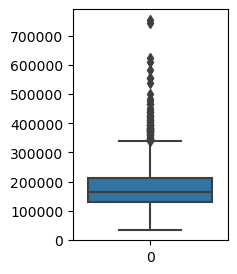

In [246]:

plt.figure(figsize=(2,3))
sns.boxplot(df['SalePrice'])
plt.show()

<Axes: >

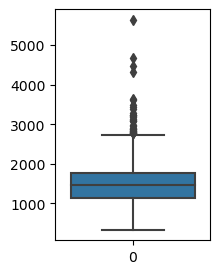

In [247]:
plt.figure(figsize=(2,3))
sns.boxplot(df['GrLivArea'])

<Axes: >

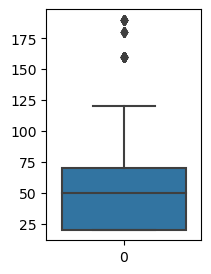

In [248]:
plt.figure(figsize=(2,3))
sns.boxplot(df['MSSubClass'])

<Axes: >

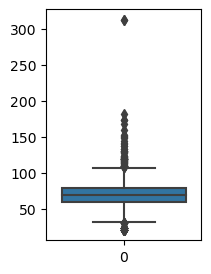

In [249]:
plt.figure(figsize=(2,3))
sns.boxplot(df['LotFrontage'])

### Outlier handelling

In [250]:
#Checking some more numeric columns for outliers

Text(0.5, 1.0, '2ndFlrSF')

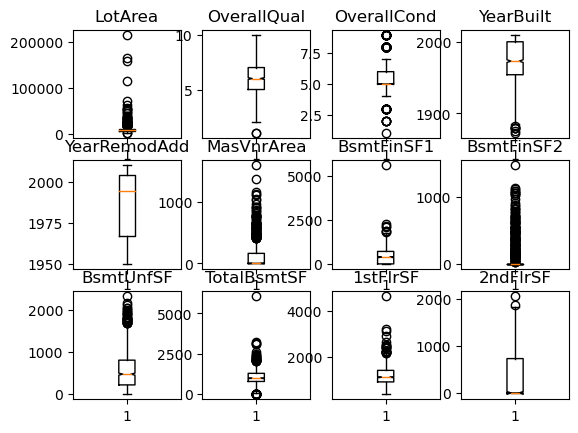

In [251]:


fig, axs = plt.subplots(3, 4)


axs[0, 0].boxplot(df['LotArea'])
axs[0, 0].set_title('LotArea')

axs[0, 1].boxplot(df['OverallQual'], 1)
axs[0, 1].set_title('OverallQual')

axs[0, 2].boxplot(df['OverallCond'], 2)
axs[0, 2].set_title('OverallCond')

axs[0, 3].boxplot(df['YearBuilt'], 3)
axs[0, 3].set_title('YearBuilt')

  
axs[1, 0].boxplot(df['YearRemodAdd'])
axs[1, 0].set_title('YearRemodAdd')

axs[1, 1].boxplot(df['MasVnrArea'], 3)
axs[1, 1].set_title('MasVnrArea')

axs[1, 2].boxplot(df['BsmtFinSF1'], 3)
axs[1, 2].set_title('BsmtFinSF1')

axs[1, 3].boxplot(df['BsmtFinSF2'], 3)
axs[1, 3].set_title('BsmtFinSF2')

axs[2,0].boxplot(df['BsmtUnfSF'], 3)
axs[2,0].set_title('BsmtUnfSF')

axs[2, 1].boxplot(df['TotalBsmtSF'], 3)
axs[2, 1].set_title('TotalBsmtSF')

axs[2, 2].boxplot(df['1stFlrSF'], 3)
axs[2, 2].set_title('1stFlrSF')

axs[2, 3].boxplot(df['2ndFlrSF'], 3)
axs[2, 3].set_title('2ndFlrSF')


We can see all of them mostly have outliers ,we will remove outliers using the interquartile range (IQR) method 

we are calculating the interquartile range (IQR) for the columns in the DataFrame df. It first computes the first quartile (Q1) and third quartile (Q3), then calculates the IQR as the difference between Q3 and Q1, providing a measure of the spread of the middle 50% of the data in respective columns.

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered)

In [252]:
# calculating IQR for all numeric columns
Q1 = df[numcol].quantile(0.05)
Q3 = df[numcol].quantile(0.95)
IQR = Q3 - Q1


In [253]:
IQR

MSSubClass          140.00
LotFrontage          68.05
LotArea           14089.45
OverallQual           4.00
OverallCond           4.00
YearBuilt            91.00
YearRemodAdd         57.00
MasVnrArea          456.00
BsmtFinSF1         1274.00
BsmtFinSF2          396.20
BsmtUnfSF          1468.00
TotalBsmtSF        1233.70
1stFlrSF           1158.30
2ndFlrSF           1141.05
LowQualFinSF          0.00
GrLivArea          1618.10
BsmtFullBath          1.00
BsmtHalfBath          1.00
FullBath              1.00
HalfBath              1.00
BedroomAbvGr          2.00
KitchenAbvGr          0.00
TotRmsAbvGrd          6.00
Fireplaces            2.00
GarageYrBlt          77.00
GarageCars            3.00
GarageArea          850.10
WoodDeckSF          335.00
OpenPorchSF         175.05
EnclosedPorch       180.15
ScreenPorch         160.00
MoSold                9.00
YrSold                4.00
SalePrice        238100.00
dtype: float64

In [254]:
# 1.5 * IQR is lower bounds and upper bounds
df = df[~((df[numcol] < (Q1 - 1.5 * IQR)) |(df[numcol] > (Q3 + 1.5 * IQR))).any(axis=1)]

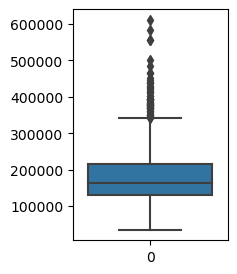

In [255]:
# Sale columns
plt.figure(figsize=(2,3))
sns.boxplot(df['SalePrice'])
plt.show()

<Axes: >

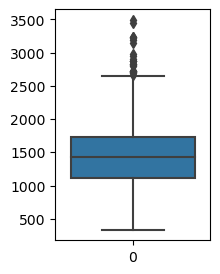

In [256]:
plt.figure(figsize=(2,3))
sns.boxplot(df['GrLivArea'])

<Axes: >

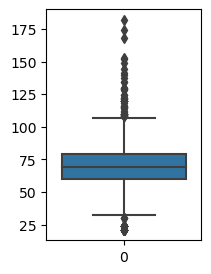

In [257]:
plt.figure(figsize=(2,3))
sns.boxplot(df['LotFrontage'])

<Axes: >

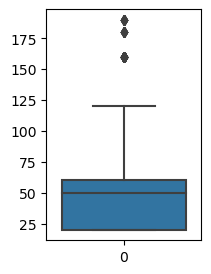

In [258]:
plt.figure(figsize=(2,3))
sns.boxplot(df['MSSubClass'])

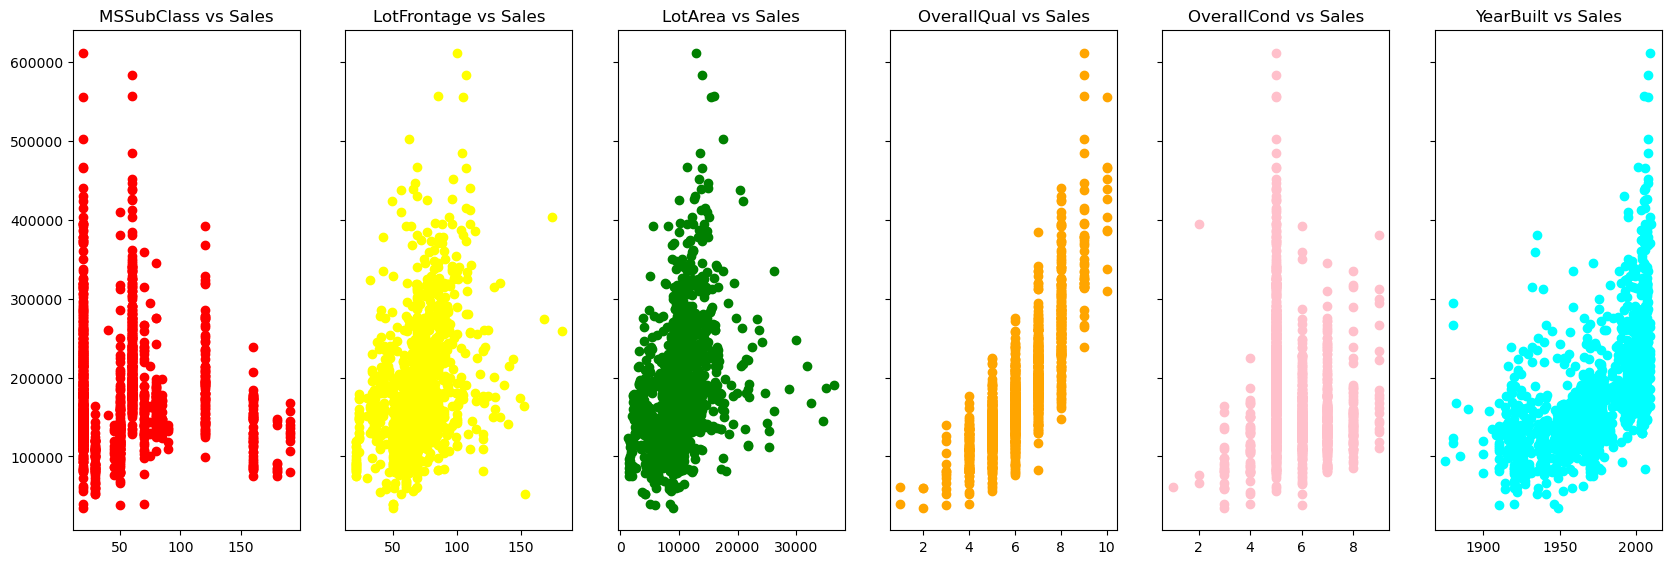

In [259]:
fig, ax = plt.subplots(ncols=6, sharey=True)

ax[0].scatter(df['MSSubClass'], df['SalePrice'],c="red")
ax[0].set_title('MSSubClass vs Sales')

ax[1].scatter(df['LotFrontage'], df['SalePrice'],c="yellow")
ax[1].set_title('LotFrontage vs Sales')

ax[2].scatter(df['LotArea'], df['SalePrice'],c="green")
ax[2].set_title('LotArea vs Sales')

ax[3].scatter(df['OverallQual'], df['SalePrice'],c="orange")

ax[3].set_title('OverallQual vs Sales')

ax[4].scatter(df['OverallCond'], df['SalePrice'],c="pink")
ax[4].set_title('OverallCond vs Sales')

ax[5].scatter(df['YearBuilt'], df['SalePrice'],c="cyan")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 6.5, forward=True)

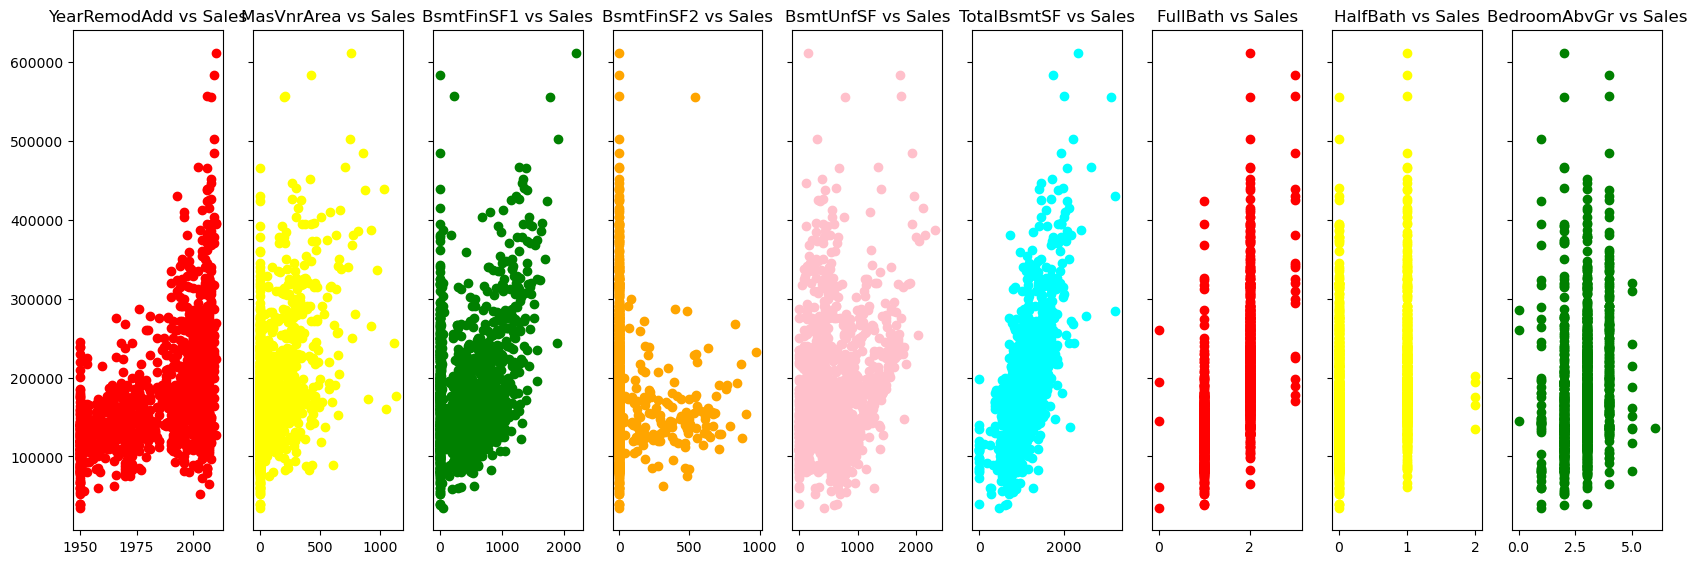

In [260]:
fig, ax = plt.subplots(ncols=9, sharey=True)

ax[0].scatter(df['YearRemodAdd'], df['SalePrice'],c="red")
ax[0].set_title('YearRemodAdd vs Sales')

ax[1].scatter(df['MasVnrArea'], df['SalePrice'],c="yellow")
ax[1].set_title('MasVnrArea vs Sales')

ax[2].scatter(df['BsmtFinSF1'], df['SalePrice'],c="green")
ax[2].set_title('BsmtFinSF1 vs Sales')

ax[3].scatter(df['BsmtFinSF2'], df['SalePrice'],c="orange")
ax[3].set_title('BsmtFinSF2 vs Sales')

ax[4].scatter(df['BsmtUnfSF'], df['SalePrice'],c="pink")
ax[4].set_title('BsmtUnfSF vs Sales')

ax[5].scatter(df['TotalBsmtSF'], df['SalePrice'],c="cyan")
ax[5].set_title('TotalBsmtSF vs Sales')

ax[6].scatter(df['FullBath'], df['SalePrice'],c="red")
ax[6].set_title('FullBath vs Sales')

ax[7].scatter(df['HalfBath'], df['SalePrice'],c="yellow")
ax[7].set_title('HalfBath vs Sales')

ax[8].scatter(df['BedroomAbvGr'], df['SalePrice'],c="green")
ax[8].set_title('BedroomAbvGr vs Sales')

fig.set_size_inches(20.5, 6.5, forward=True)

#'1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'

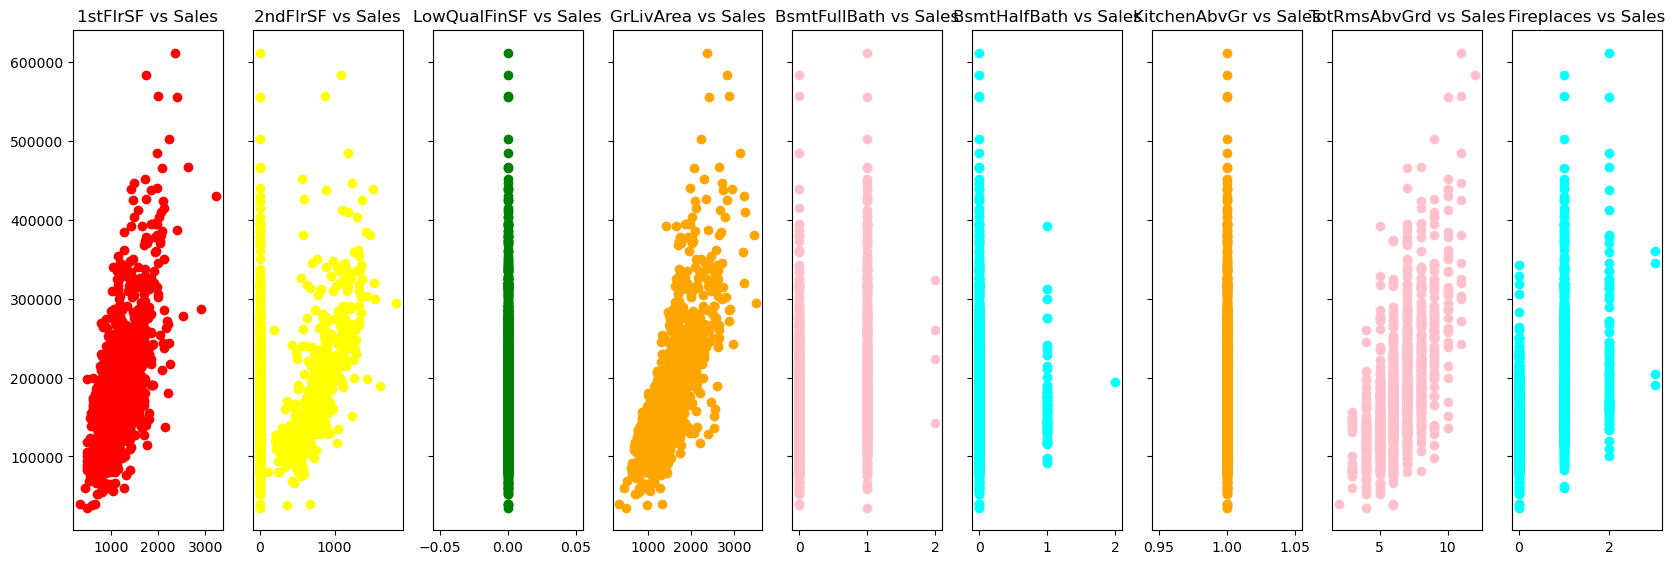

In [261]:
fig, ax = plt.subplots(ncols=9, sharey=True)

ax[0].scatter(df['1stFlrSF'], df['SalePrice'],c="red")
ax[0].set_title('1stFlrSF vs Sales')

ax[1].scatter(df['2ndFlrSF'], df['SalePrice'],c="yellow")
ax[1].set_title('2ndFlrSF vs Sales')

ax[2].scatter(df['LowQualFinSF'], df['SalePrice'],c="green")
ax[2].set_title('LowQualFinSF vs Sales')

ax[3].scatter(df['GrLivArea'], df['SalePrice'],c="orange")
ax[3].set_title('GrLivArea vs Sales')

ax[4].scatter(df['BsmtFullBath'], df['SalePrice'],c="pink")
ax[4].set_title('BsmtFullBath vs Sales')

ax[5].scatter(df['BsmtHalfBath'], df['SalePrice'],c="cyan")
ax[5].set_title('BsmtHalfBath vs Sales')

ax[6].scatter(df['KitchenAbvGr'], df['SalePrice'],c="orange")
ax[6].set_title('KitchenAbvGr vs Sales')

ax[7].scatter(df['TotRmsAbvGrd'], df['SalePrice'],c="pink")
ax[7].set_title('TotRmsAbvGrd vs Sales')

ax[8].scatter(df['Fireplaces'], df['SalePrice'],c="cyan")
ax[8].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 6.5, forward=True)



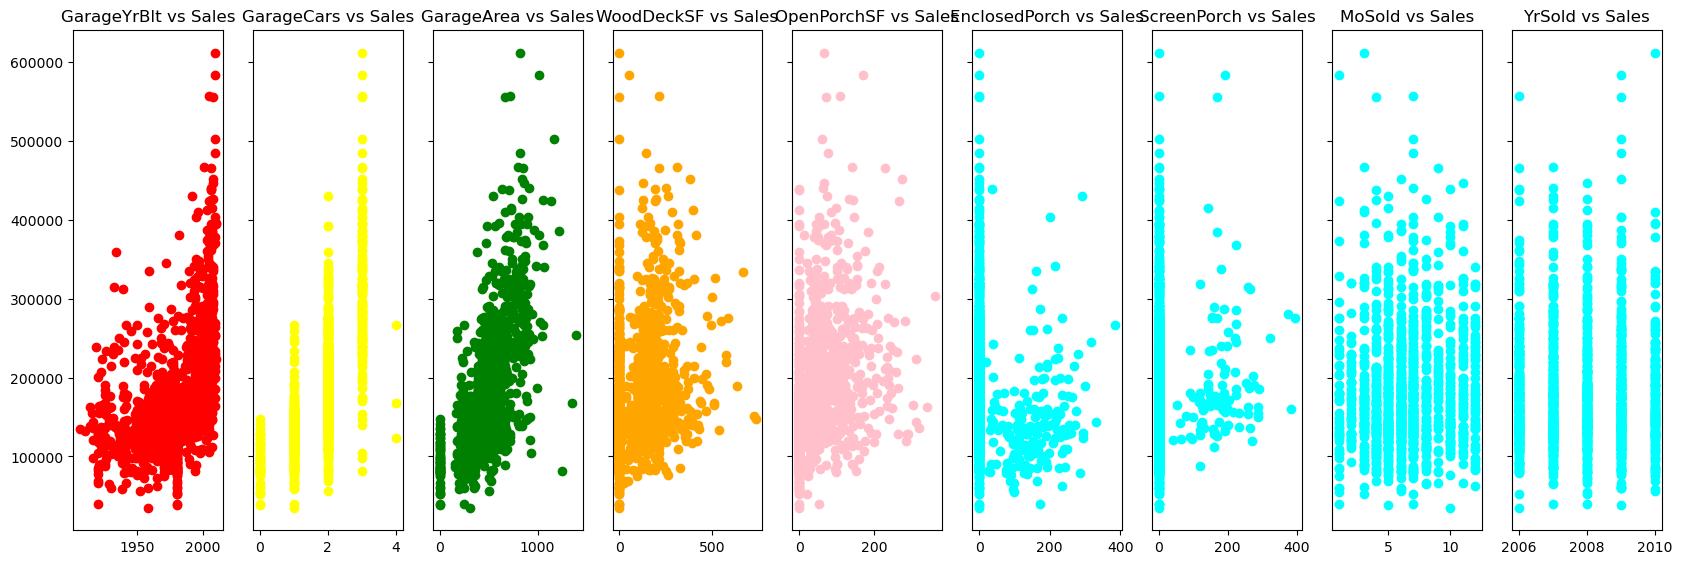

In [262]:
fig, ax = plt.subplots(ncols=9, sharey=True)

ax[0].scatter(df['GarageYrBlt'], df['SalePrice'],c="red")
ax[0].set_title('GarageYrBlt vs Sales')

ax[1].scatter(df['GarageCars'], df['SalePrice'],c="yellow")
ax[1].set_title('GarageCars vs Sales')

ax[2].scatter(df['GarageArea'], df['SalePrice'],c="green")
ax[2].set_title('GarageArea vs Sales')

ax[3].scatter(df['WoodDeckSF'], df['SalePrice'],c="orange")
ax[3].set_title('WoodDeckSF vs Sales')

ax[4].scatter(df['OpenPorchSF'], df['SalePrice'],c="pink")
ax[4].set_title('OpenPorchSF vs Sales')

ax[5].scatter(df['EnclosedPorch'], df['SalePrice'],c="cyan")
ax[5].set_title('EnclosedPorch vs Sales')

ax[6].scatter(df['ScreenPorch'], df['SalePrice'],c="cyan")
ax[6].set_title('ScreenPorch vs Sales')

ax[7].scatter(df['MoSold'], df['SalePrice'],c="cyan")
ax[7].set_title('MoSold vs Sales')

ax[8].scatter(df['YrSold'], df['SalePrice'],c="cyan")
ax[8].set_title('YrSold vs Sales')
fig.set_size_inches(20.5, 6.5, forward=True)


As we can see we have removed certain amount of outliers from our dataset

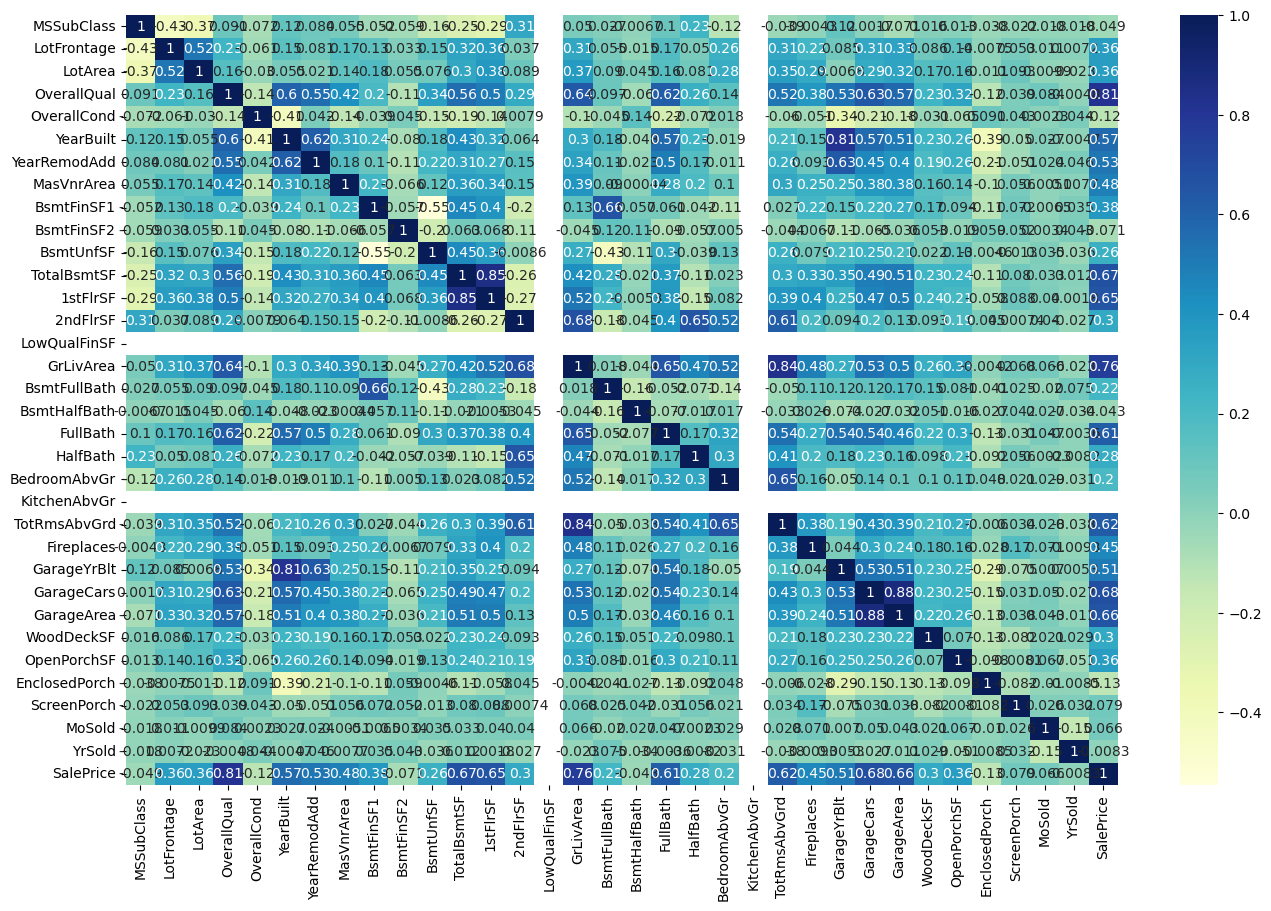

In [263]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df[numcol].corr(), annot = True, cmap="YlGnBu")
plt.show()

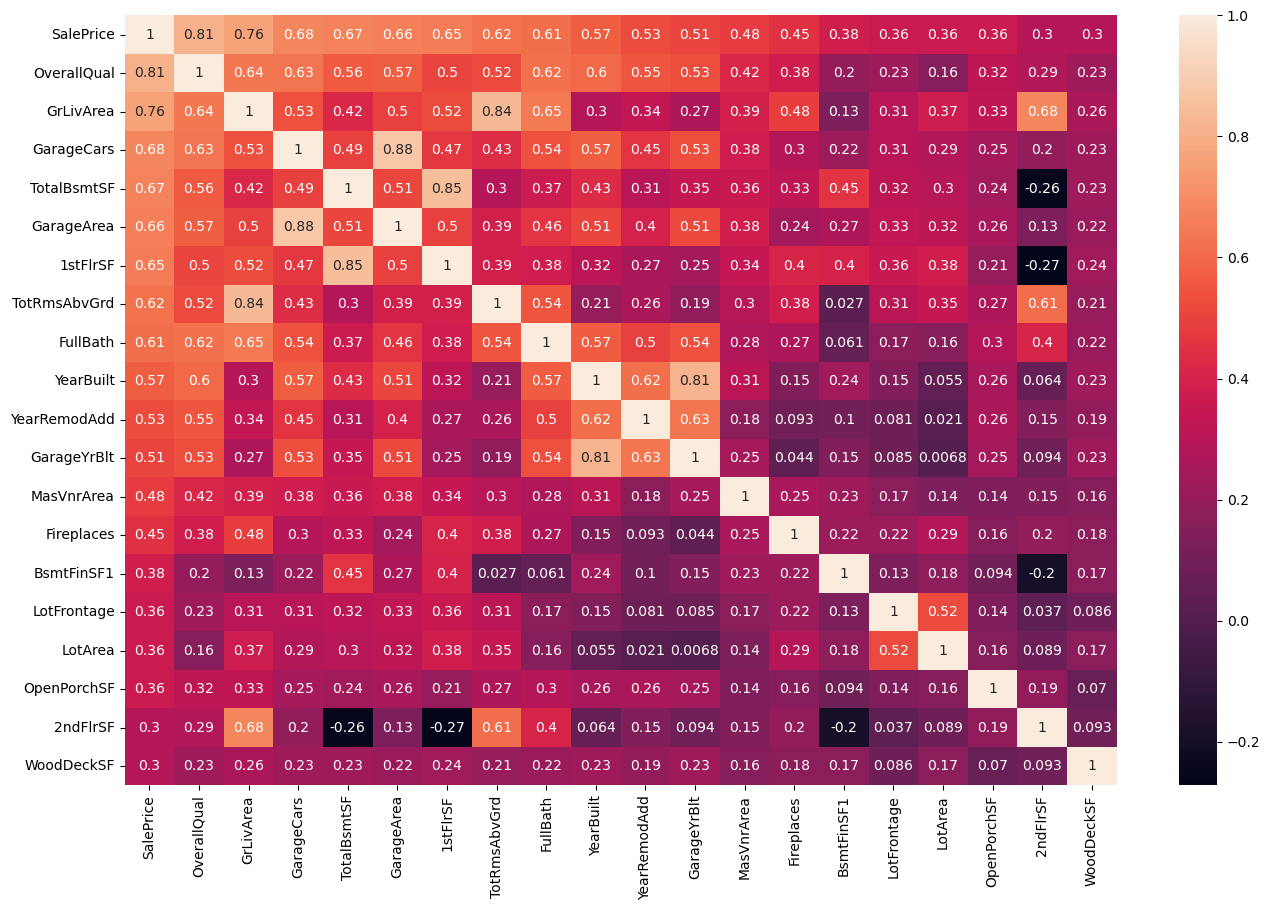

In [264]:
#sales price correlation matrix
plt.figure(figsize = (16, 10))
# number of variables which have the highest correlation with 'Sales price'
n=20
corrmatrix = df[numcol].corr()
cols = corrmatrix.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(df[cols].corr(),annot=True)
plt.show()



#####  
here from the heatmap we can say that OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF
are highly correlated to Saleprice

###  Handelling categorical column using dummy variables

In [265]:
catcol

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [267]:
# Converting categorical columns value into Dummy variable
df=pd.get_dummies(df,drop_first=True,dtype=int)
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008     208500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007     181500            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008     223500            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0   
3          70         60.0     9550        

It seems like we have changed all the categorical strings into a representative number.
our dataset looks ready to build our models!


# Model Building

Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [268]:
#Split the data into train and test
X=df
y = df.pop('SalePrice')

In [270]:
X.shape

(1333, 218)

In [271]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [272]:
# importing  train_test_split to split the data

from sklearn.model_selection import train_test_split


In [273]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [274]:
X_train.shape

(893, 218)

In [275]:
y_train.shape

(893,)

In [276]:
X_test.shape

(440, 218)

In [277]:
y_test.shape

(440,)

In [278]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0        924          924       948       742             0       1690             0             0         2         1             3             1             7           1       2000.0           2         463         100           48              0            0      11    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80        487         1142      1175      1540             0       2715             0             1         3         1             4             1            11           2       1994.0           2         831           0          204              0            0       7    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0        916          916       916       684             0       1600             0             0         2         1             3             1             7           1       1997.0           2         460         100           38              0            0       8    2007            0            0            1            0            1             0             0             0                1                0                0                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
512           20         70.0     9100            5            5       1958   

In [279]:
# taking all the numerical columns from X_train
numcols=X_train.select_dtypes(include=['int32','int64','float32','float64']).columns
numcols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=218)

In [280]:
X_train[numcols]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0        924          924       948       742             0       1690             0             0         2         1             3             1             7           1       2000.0           2         463         100           48              0            0      11    2007            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80        487         1142      1175      1540             0       2715             0             1         3         1             4             1            11           2       1994.0           2         831           0          204              0            0       7    2008            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0        916          916       916       684             0       1600             0             0         2         1             3             1             7           1       1997.0           2         460         100           38              0            0       8    2007            0            0            1            0            1             0             0             0                1                0                0                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0   
512           20         70.0     9100            5            5       1958   

### Scalling

In [281]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=MinMaxScaler()

In [282]:
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_test[numcols] = scaler.transform(X_test[numcols])

In [283]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1108    0.235294     0.298137  0.187723     0.555556        0.500   0.932836      0.833333    0.000000    0.000000    0.000000   0.395548     0.288210  0.170306  0.460583           0.0   0.407819           0.0           0.0  0.666667       0.5      0.500000           0.0      0.444444    0.333333         0.90        0.50    0.333094    0.135870     0.131868            0.0          0.0  0.909091    0.25          0.0          0.0          1.0          0.0          1.0           0.0           0.0           1.0              0.0              0.0              1.0               0.0                0.0            0.0            0.0               1.0            0.0            0.0                   0.0                  0.0                   0.0                   0.0                   0.0                   0.0                   0.0                   1.0                  0.0                   0.0                   0.0                 0.0                   0.0                  0.0   
745     0.235294     0.298137  0.213431     0.777778        1.000   0.753731      0.766667    0.255979    0.262797    0.088300   0.208476     0.356207  0.252911  0.955928           0.0   0.753286           0.0           0.5  1.000000       0.5      0.666667           0.0      0.888889    0.666667         0.84        0.50    0.597842    0.000000     0.560440            0.0          0.0  0.545455    0.50          0.0          0.0          1.0          0.0          1.0           0.0           0.0           0.0              0.0              0.0              1.0               0.0                0.0            0.0            0.0               1.0            0.0            0.0                   0.0                  0.0                   0.0                   0.0                   0.0                   0.0                   0.0                   0.0                  0.0                   0.0                   0.0                 0.0                   0.0                  1.0   
1134    0.235294     0.223602  0.208004     0.555556        0.500   0.910448      0.783333    0.000000    0.000000    0.000000   0.392123     0.285714  0.158661  0.424581           0.0   0.377486           0.0           0.0  0.666667       0.5      0.500000           0.0      0.444444    0.333333         0.87        0.50    0.330935    0.135870     0.104396            0.0          0.0  0.636364    0.25          0.0          0.0          1.0          0.0          1.0           0.0           0.0           0.0              1.0              0.0              0.0               0.0                0.0            0.0            0.0               1.0            0.0            0.0                   0.0                  0.0                   0.0                   0.0                   0.0                   0.0                   0.0                   1.0                  0.0                   0.0                   0.0                 0.0                   0.0                  0.0   
512     0.000000     0.304348  0.217344     0.444444        0.500 

In [284]:
X_train.shape

(893, 218)

In [285]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
990     0.235294     0.378882  0.227399     0.777778         0.50   0.910448      0.800000    0.374668    0.490859    0.000000   0.137842     0.435434  0.337336  0.611421           0.0   0.644422           0.5           0.0  0.666667       0.5           0.5           0.0      0.444444    0.333333         0.87        0.75    0.625899    0.000000     0.192308       0.000000          0.0  0.454545    0.00          0.0          0.0          1.0          0.0          1.0           0.0           0.0           1.0              0.0              0.0              1.0               0.0                0.0            0.0            0.0               1.0            0.0            0.0                   0.0                  0.0                   0.0                   0.0                   0.0                   0.0                   0.0                   0.0                  0.0                   0.0                   0.0                 0.0                   0.0                  0.0   
1161    0.000000     0.298137  0.379531     0.555556         0.75   0.589552      0.933333    0.063773    0.332724    0.000000   0.243151     0.404242  0.422125  0.000000           0.0   0.390967           0.5           0.0  0.333333       0.0           0.5           0.0      0.444444    0.333333         0.83        0.50    0.664748    0.146739     0.000000       0.000000          0.0  0.909091    0.50          0.0          0.0          1.0          0.0          1.0           0.0           0.0           0.0              0.0              1.0              0.0               0.0                1.0            0.0            0.0               0.0            0.0            0.0                   0.0                  0.0                   0.0                   0.0                   0.0                   1.0                   0.0                   0.0                  0.0                   0.0                   0.0                 0.0                   0.0                  0.0   
1369    0.000000     0.167702  0.261190     0.777778         0.50   0.955224      0.883333    0.151461    0.169104    1.072848   0.134846     0.516843  0.432314  0.000000           0.0   0.400404           0.5           0.0  0.666667       0.0           0.5           0.0      0.555556    0.333333         0.93        0.50    0.361151    0.000000     0.719780       0.000000          0.0  0.363636    1.00          0.0          0.0          1.0          0.0          1.0           1.0           0.0           0.0              0.0              0.0              1.0               0.0                0.0            1.0            0.0               0.0            0.0            0.0                   0.0                  0.0                   0.0                   0.0                   1.0                   0.0                   0.0                   0.0                  0.0                   0.0                   0.0                 0.0                   0.0                  0.0   
329     0.294118     0.242236  0.140278     0.444444         0.50 

In [286]:
X_test.shape

(440, 218)

## Model Building and Evaluation

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

### RFE (Recursive feature elimination)

In [287]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [291]:
# Build a Lienar Regression model using SKLearn for RFE
lm = LinearRegression()                               # Creating RFE object
lm.fit(X_train,y_train)                               # fitting train values to the object

rfe = RFE(estimator=lm, n_features_to_select=25)     #Running RFE
rfe = rfe.fit(X_train, y_train)  

In [292]:
#Dislaying selected feature by RFE and their ranking as 1
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 34),
 ('LotFrontage', False, 68),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 18),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 117),
 ('MasVnrArea', False, 45),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 173),
 ('BsmtHalfBath', False, 61),
 ('FullBath', False, 139),
 ('HalfBath', False, 191),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 14),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 182),
 ('GarageYrBlt', False, 123),
 ('GarageCars', False, 31),
 ('GarageArea', False, 153),
 ('WoodDeckSF', False, 69),
 ('OpenPorchSF', False, 64),
 ('EnclosedPorch', False, 111),
 ('ScreenPorch', False, 43),
 ('MoSold', False, 187),
 ('YrSold', False, 159),
 ('MSZoning_FV', False, 41),
 ('MSZoning_RH', False, 58),
 ('MSZoning_RL', False, 59),
 

In [296]:
# columns upported by RFE
col=X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_CBlock', 'Exterior1st_Stone', 'Exterior2nd_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'Heating_OthW', 'Functional_Maj2', 'GarageQual_TA', 'SaleType_CWD'], dtype='object')

In [297]:
# columns not upported by RFE
col2=X_train.columns[~rfe.support_]
col2

Index(['MSSubClass', 'LotFrontage', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=193)

In [298]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(893, 25)
(440, 25)
(893,)
(440,)


In [299]:
lm1=lm.fit(X_train, y_train)

In [300]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-1.7517170984620102e+16
[-1.33532165e+04  1.17078586e+04  3.95532714e+04  5.45131305e+04
  4.42679813e+04  3.61223559e+04  6.32826976e+03  1.66893226e+04
 -2.13695770e+16 -8.84864568e+15 -2.28150511e+16  3.13120950e+16
  3.37672680e+16  1.97958765e+16  3.70215766e+16 -3.64583275e+16
  1.24937500e+03 -6.87057520e+03  7.95687500e+03  1.29500000e+02
 -3.50370938e+04 -3.10497151e+16  3.04007500e+04  7.86000000e+02
 -5.23287500e+03  2.06216250e+04 -4.16202344e+03  1.03008750e+04
  1.08316250e+04  6.05368750e+03  2.33262930e+04  3.99750000e+02
 -2.53312500e+03  3.56862500e+04  3.08207812e+04  2.47685000e+04
  1.58930000e+04  4.90895000e+04 -1.57937500e+02 -5.57778125e+03
  1.88050000e+03  1.34074375e+04 -1.23810000e+04  4.06862500e+03
 -4.45804375e+04  7.06162500e+03 -5.78112500e+03 -1.41129297e+04
 -2.46550000e+03  8.08562500e+02 -4.61541250e+04  1.65263750e+04
  9.08762500e+03 -5.04787500e+03 -1.81668750e+04 -9.44500000e+03
  9.81662500e+03 -1.79528516e+04 -1.14242500e+04 -1.06961250e+04
 

### Model Evalaution

In [301]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [343]:
#R2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
print("\nR2 Score on Train set:")
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("\nR2 score on test set:")
print(r2_test_lr)
metric.append(r2_test_lr)

print("\nRSS on train set :")
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

print("\nRSS on test set:")
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

print("\nMSE on train set:")
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

print("\nMSE on test set:")
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


#print("\nRMSE on train set:")
#rmse_train_lr=mse_train_lr**0.5 
#print(rmse_train_lr)

#print("\nRMSE on test set:")
#rmse_test_lr=mse_test_lr**0.5 
#print(rmse_test_lr)



R2 Score on Train set:
0.8820074509868872

R2 score on test set:
0.8529748711714047

RSS on train set :
596489896161.7102

RSS on test set:
365851650123.98267

MSE on train set:
667961809.8115456

MSE on test set:
831481023.0090516


### Ridge and Lasso Regression

In [315]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge regression

In [316]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

In [317]:
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [318]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 4.0}
-15697.722062102559


#### The optimum value of alpha is 4 for Ridge

In [319]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 48495.56634299, 107307.48733635,  48594.49238845,  67591.7273982 ,
         4140.20282619,  14894.79426921,  58152.20296964,  67418.75132307,
        34260.94740303,  81045.20219147, -33074.57871885,  54748.64948865,
        31614.72287862, -15398.12803878,   5155.88141412,   5731.23462672,
       -10820.03044165, -12457.88314269, -10820.03044165, -45793.49741947,
       -59973.30523958, -10972.95478675, -11019.48076227,  -7283.29014808,
       -10799.50099877])

In [321]:
#Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.873194882513791
0.8620092899244391
641040235122.9517
343370751552.1335
717850207.3045372
780388071.7093943


### Lasso

In [322]:

lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [323]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 2.0}
-19121.370426251182


#### The optimum value of alpha is 2 for Lasso

In [324]:
alpha =2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=2)

In [325]:
lasso.coef_

array([ 6.22668351e+04,  1.30105576e+05,  4.52091982e+04,  5.49144550e+04,
        4.27991019e+03,  0.00000000e+00,  7.01078365e+04,  1.11173737e+05,
        5.85421948e+04,  5.66249560e+04, -6.45785943e+04,  5.32548981e+04,
        7.03930255e+04, -4.29104344e+04,  3.24743129e+04,  4.09812923e+04,
       -6.97277610e+04, -8.01346259e+04, -3.37352374e+01, -5.74943286e+04,
       -6.58276674e+04, -6.10724351e+04, -5.95760449e+04, -8.76826816e+03,
       -3.40452171e+04])

In [326]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8820008198275171
0.8535711495616316
596523418783.2415
364367894015.5143
667999349.1413678
828108850.0352597


In [327]:
metric2

[0.873194882513791,
 0.8620092899244391,
 641040235122.9517,
 343370751552.1335,
 26792.72676127865,
 27935.42682167921]

In [345]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],'Linear Regression': metric }


lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
#lr_metric = pd.DataFrame(lr_table,columns =['Metric'] )
rg_metric = pd.Series(metric2, name='Ridge Regression')
ls_metric = pd.Series(metric3, name='Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.820075e-01      8.731949e-01      8.820008e-01
1   R2 Score (Test)       8.529749e-01      8.620093e-01      8.535711e-01
2       RSS (Train)       5.964899e+11      6.410402e+11      5.965234e+11
3        RSS (Test)       3.658517e+11      3.433708e+11      3.643679e+11
4       MSE (Train)       2.584496e+04      2.679273e+04      2.584568e+04
5        MSE (Test)       2.883541e+04      2.793543e+04      2.877688e+04

### Model Evaluation
The r2_score of Ridge is slightly higher than lasso for the test dataset


In [346]:
ridge_pred = ridge.predict(X_test1)

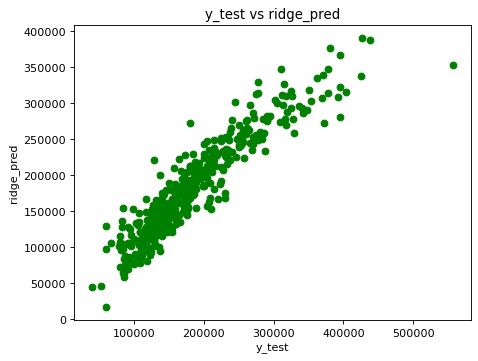

In [363]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=80)
plt.title('y_test vs ridge_pred')
plt.scatter(y_test,ridge_pred,c="green")
plt.xlabel('y_test')                          # X-label
plt.ylabel('ridge_pred')  
plt.show()

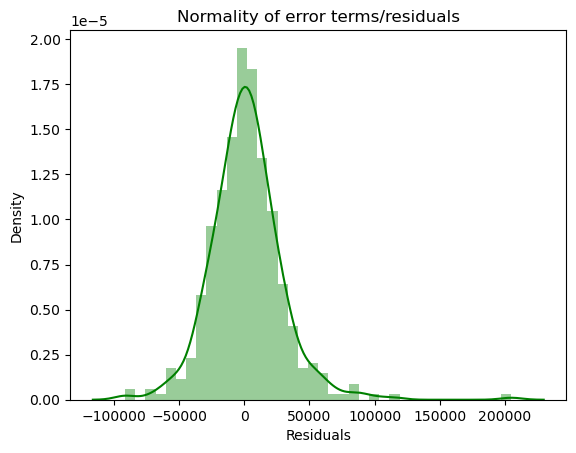

In [369]:
# Distribution of errors

y_res=y_test-ridge_pred
sns.distplot(y_res,kde=True,color='green')
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [372]:
lasso_pred = lasso.predict(X_test1)

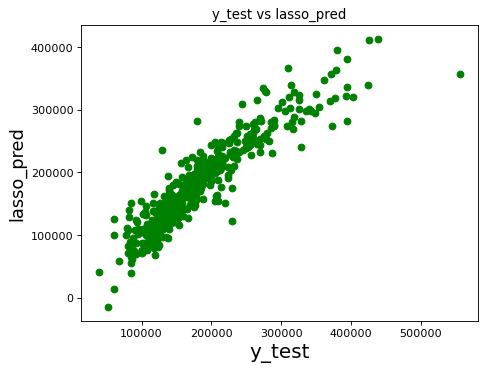

In [374]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=80)
plt.title('y_test vs lasso_pred')
plt.scatter(y_test,lasso_pred,c='green')
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

In [375]:
y_res=y_test-lasso_pred


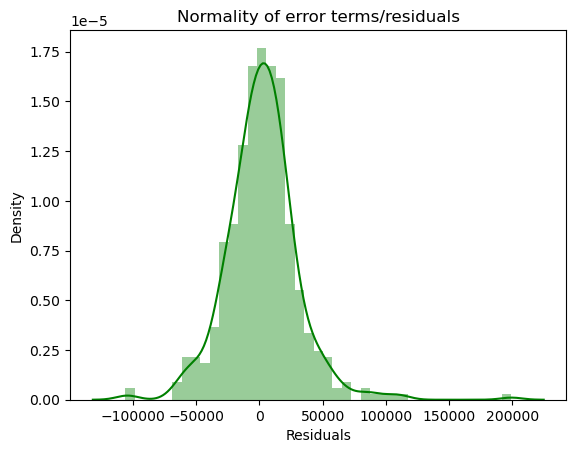

In [376]:
# Distribution of errors
sns.distplot(y_res,kde=True,color='green')
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lets observe the changes in the coefficients after regularization

In [377]:
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns

In [378]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [379]:
pd.set_option('display.max_rows', None)
betas.head(68)


Ridge          Lasso
LotArea              48495.566343   62266.835122
OverallQual         107307.487336  130105.575800
YearBuilt            48594.492388   45209.198211
BsmtFinSF1           67591.727398   54914.454963
BsmtFinSF2            4140.202826    4279.910192
BsmtUnfSF            14894.794269       0.000000
TotalBsmtSF          58152.202970   70107.836456
1stFlrSF             67418.751323  111173.737218
2ndFlrSF             34260.947403   58542.194794
GrLivArea            81045.202191   56624.956047
BedroomAbvGr        -33074.578719  -64578.594344
TotRmsAbvGrd         54748.649489   53254.898118
Street_Pave          31614.722879   70393.025502
LandSlope_Sev       -15398.128039  -42910.434385
RoofStyle_Shed        5155.881414   32474.312859
RoofMatl_Metal        5731.234627   40981.292304
Exterior1st_CBlock  -10820.030442  -69727.760999
Exterior1st_Stone   -12457.883143  -80134.625948
Exterior2nd_CBlock  -10820.030442     -33.735237
ExterQual_Gd        -45793.497419  -57494.328602
ExterQual_TA        -59973.305240  -65827.667404
Heating_OthW        -10972.954787  -61072.435114
Functional_Maj2     -11019.480762  -59576.044946
GarageQual_TA        -7283.290148   -8768.268162
SaleType_CWD        -10799.500999  -34045.217132

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

- The company wants to know:

           -Which variables are significant in predicting the price of a house, and

           -How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Which variables are significant in predicting the price of a house?

#### Answer : The below mentioned variables are significant in predicting the price

    LotArea      -   Lot size in square feet

    OverallQual  -   Rates the overall material and finish of the house
 
    YearBuilt    -   Original construction date

    BsmtFinSF1   -  Type 1 finished square feet

    TotalBsmtSF  -  Total square feet of basement area

    GrLivArea    -  Above grade (ground) living area square feet

    TotRmsAbvGrd -  Total rooms above grade (does not include bathrooms)

    Street_Pave  -  Pave road access to property

    

###  How well those variables describe the price of a house
#### Answer :
     ----------------------------------------------------------
                         Ridge Regression  | Lasso Regression
     ----------------------------------------------------------                 
      R2 score(Train)  |          0.87     |        0.82

      R2 score(Test)   |          0.86     |        0.85

In [380]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.820075e-01      8.731949e-01      8.820008e-01
1   R2 Score (Test)       8.529749e-01      8.620093e-01      8.535711e-01
2       RSS (Train)       5.964899e+11      6.410402e+11      5.965234e+11
3        RSS (Test)       3.658517e+11      3.433708e+11      3.643679e+11
4       MSE (Train)       2.584496e+04      2.679273e+04      2.584568e+04
5        MSE (Test)       2.883541e+04      2.793543e+04      2.877688e+04

In [381]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
LotArea              48495.566343   62266.835122
OverallQual         107307.487336  130105.575800
YearBuilt            48594.492388   45209.198211
BsmtFinSF1           67591.727398   54914.454963
BsmtFinSF2            4140.202826    4279.910192
BsmtUnfSF            14894.794269       0.000000
TotalBsmtSF          58152.202970   70107.836456
1stFlrSF             67418.751323  111173.737218
2ndFlrSF             34260.947403   58542.194794
GrLivArea            81045.202191   56624.956047
BedroomAbvGr        -33074.578719  -64578.594344
TotRmsAbvGrd         54748.649489   53254.898118
Street_Pave          31614.722879   70393.025502
LandSlope_Sev       -15398.128039  -42910.434385
RoofStyle_Shed        5155.881414   32474.312859
RoofMatl_Metal        5731.234627   40981.292304
Exterior1st_CBlock  -10820.030442  -69727.760999
Exterior1st_Stone   -12457.883143  -80134.625948
Exterior2nd_CBlock  -10820.030442     -33.735237
ExterQual_Gd        -45793.497419  -57494.328602
ExterQual_TA        -59973.305240  -65827.667404
Heating_OthW        -10972.954787  -61072.435114
Functional_Maj2     -11019.480762  -59576.044946
GarageQual_TA        -7283.290148   -8768.268162
SaleType_CWD        -10799.500999  -34045.217132

# Solving and testing the answers for problem statement 2 ...

### doubling the alpha for both ridge and lasso

ridge regression

In [383]:
#Change the alpha value from 4 to 8
alpha = 8
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

Ridge(alpha=8)

In [384]:
# calculating  R2 score, RSS and RMSE

y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#Alpha =4
#R2score(train) 0.873194882513791
#R2score(test)  0.8620092899244391


0.8632600332904024
0.8564643650812065
691264060535.7134
357168528298.6865
774091893.0971035
811746655.2242875


#### R2score  in ridge has decreased on training data as well as testing data

Lasso Regression

In [386]:
# Changed alpha 2 to 4
alpha =4
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train1, y_train) 

Lasso(alpha=4)

In [387]:
# calculating metrics R2 score, RSS and RMSE
y_pred_train = lasso2.predict(X_train1)
y_pred_test = lasso2.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#  R2score at alpha=2
#train=0.8820008198275171
#test=0.8535711495616316


0.881980926349407
0.8541521933646786
596623986647.8351
362922047065.18176
668111967.1308343
824822834.2390494


#### R2score  in lasso has decreased slightly on training data  and increased slightly on testing data

In [389]:
#important predictor variables
betas = pd.DataFrame(index=X_train1.columns)
betas.rows = X_train1.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge2          Ridge          Lasso         Lasso2
LotArea             42135.149970   48495.566343   62266.835122   62208.202135
OverallQual         92635.827841  107307.487336  130105.575800  130434.508972
YearBuilt           47933.027424   48594.492388   45209.198211   45200.110263
BsmtFinSF1          65436.933157   67591.727398   54914.454963   54934.487601
BsmtFinSF2           2443.846154    4140.202826    4279.910192    4097.065136
BsmtUnfSF           15038.133014   14894.794269       0.000000       0.000000
TotalBsmtSF         56306.679066   58152.202970   70107.836456   70064.402426
1stFlrSF            63349.198369   67418.751323  111173.737218   82488.003117
2ndFlrSF            31115.876502   34260.947403   58542.194794   41716.533808
GrLivArea           75568.343162   81045.202191   56624.956047   87323.467901
BedroomAbvGr       -19500.856225  -33074.578719  -64578.594344  -64177.281461
TotRmsAbvGrd        54514.187235   54748.649489   53254.898118   53086.981379
Street_Pave         20381.788978   31614.722879   70393.025502   69709.390432
LandSlope_Sev       -9610.763428  -15398.128039  -42910.434385  -41428.369812
RoofStyle_Shed       3121.311283    5155.881414   32474.312859   29329.782041
RoofMatl_Metal       3216.131087    5731.234627   40981.292304   37758.299687
Exterior1st_CBlock  -6373.862976  -10820.030442  -69727.760999  -67606.933920
Exterior1st_Stone   -5904.111484  -12457.883143  -80134.625948  -78086.976847
Exterior2nd_CBlock  -6373.862976  -10820.030442     -33.735237     -33.762424
ExterQual_Gd       -38377.408954  -45793.497419  -57494.328602  -57272.987157
ExterQual_TA       -57275.910476  -59973.305240  -65827.667404  -65615.299560
Heating_OthW        -5619.704278  -10972.954787  -61072.435114  -59138.429832
Functional_Maj2     -5788.888070  -11019.480762  -59576.044946  -57754.533908
GarageQual_TA       -5484.964297   -7283.290148   -8768.268162   -8689.349035
SaleType_CWD        -6350.580640  -10799.500999  -34045.217132  -33037.964976

####  Predictors are same but the coefficent of these predictor has changed

LotArea      -   Lot size in square feet

OverallQual  -   Rates the overall material and finish of the house

YearBuilt    -   Original construction date

BsmtFinSF1   -  Type 1 finished square feet

TotalBsmtSF  -  Total square feet of basement area

GrLivArea    -  Above grade (ground) living area square feet

TotRmsAbvGrd -  Total rooms above grade (does not include bathrooms)

Street_Pave  -  Pave road access to property

### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


After building the model the five most important variable predictor variables are:

LotArea      -   Lot size in square feet

OverallQual  -   Rates the overall material and finish of the house

YearBuilt    -   Original construction date

BsmtFinSF1   -  Type 1 finished square feet

TotalBsmtSF  -  Total square feet of basement area

Now as given these variable are not available in incoming data .
So we have to remove this top 5 variable and create a model again


In [392]:
X_train1

LotArea  OverallQual  YearBuilt  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Street_Pave  LandSlope_Sev  RoofStyle_Shed  RoofMatl_Metal  Exterior1st_CBlock  Exterior1st_Stone  Exterior2nd_CBlock  ExterQual_Gd  ExterQual_TA  Heating_OthW  Functional_Maj2  GarageQual_TA  SaleType_CWD
1108  0.187723     0.555556   0.932836    0.000000    0.000000   0.395548     0.288210  0.170306  0.460583   0.407819      0.500000      0.444444          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
745   0.213431     0.777778   0.753731    0.262797    0.088300   0.208476     0.356207  0.252911  0.955928   0.753286      0.666667      0.888889          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           0.0           0.0              0.0            1.0           0.0
1134  0.208004     0.555556   0.910448    0.000000    0.000000   0.392123     0.285714  0.158661  0.424581   0.377486      0.500000      0.444444          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
512   0.217344     0.444444   0.619403    0.238117    0.192053   0.072346     0.269495  0.139738  0.000000   0.129424      0.500000      0.222222          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
43    0.220201     0.444444   0.746269    0.127971    0.541943   0.071490     0.292576  0.166667  0.000000   0.154365      0.500000      0.222222          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
33    0.258819     0.444444   0.626866    0.465265    0.000000   0.162671     0.436057  0.443959  0.000000   0.411190      0.666667      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
269   0.183553     0.555556   0.753731    0.343236    0.000000   0.167808     0.356519  0.230349  0.000000   0.213347      0.500000      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
789   0.306036     0.555556   0.679104    0.259598    0.000000   0.113014     0.259513  0.180495  0.689634   0.541625      0.833333      0.666667          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
1038  0.001200     0.333333   0.708955    0.000000    0.000000   0.233733     0.170306  0.115721  0.338920   0.291203      0.500000      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
151   0.354195     0.777778   0.985075    0.639854    0.000000   0.132705     0.533375  0.447598  0.000000   0.414560      0.333333      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           1.0           0.0           0.0              0.0            1.0           0.0
344   0.031449     0.444444   0.753731    0.058958    0.256071   0.074914     0.167187  0.020378  0.357542   0.213010      0

In [393]:
X_train1.shape

(893, 25)

In [394]:
X_train2=X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [396]:
X_train2.shape

(893, 20)

In [397]:
X_test1

LotArea  OverallQual  YearBuilt  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Street_Pave  LandSlope_Sev  RoofStyle_Shed  RoofMatl_Metal  Exterior1st_CBlock  Exterior1st_Stone  Exterior2nd_CBlock  ExterQual_Gd  ExterQual_TA  Heating_OthW  Functional_Maj2  GarageQual_TA  SaleType_CWD
990   0.227399     0.777778   0.910448    0.490859    0.000000   0.137842     0.435434  0.337336  0.611421   0.644422      0.500000      0.444444          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           1.0           0.0           0.0              0.0            1.0           0.0
1161  0.379531     0.555556   0.589552    0.332724    0.000000   0.243151     0.404242  0.422125  0.000000   0.390967      0.500000      0.444444          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           1.0           0.0           0.0              0.0            1.0           0.0
1369  0.261190     0.777778   0.955224    0.169104    1.072848   0.134846     0.516843  0.432314  0.000000   0.400404      0.500000      0.555556          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           1.0           0.0           0.0              0.0            1.0           0.0
329   0.140278     0.444444   0.335821    0.000000    0.000000   0.255137     0.185901  0.042213  0.369957   0.239973      0.500000      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            0.0           0.0
262   0.199377     0.555556   0.761194    0.231261    0.000000   0.000000     0.157829  0.266376  0.000000   0.246714      0.500000      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
528   0.217287     0.333333   0.335821    0.159049    0.000000   0.077055     0.164691  0.045488  0.000000   0.042130      0.333333      0.222222          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
266   0.277529     0.555556   0.910448    0.326325    0.000000   0.037671     0.250156  0.117176  0.440099   0.347489      0.500000      0.555556          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
306   0.342283     0.666667   0.858209    0.319927    0.000000   0.000000     0.218341  0.233624  0.695841   0.594203      0.666667      0.555556          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           1.0           0.0           0.0              0.0            1.0           0.0
455   0.231626     0.666667   0.731343    0.418647    0.000000   0.139555     0.387399  0.277293  0.000000   0.256825      0.500000      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
772   0.180754     0.555556   0.753731    0.192870    0.140177   0.205479     0.320961  0.231805  0.000000   0.214695      0.500000      0.333333          1.0            0.0             0.0             0.0                 0.0                0.0                 0.0           0.0           1.0           0.0              0.0            1.0           0.0
405   0.242795     0.333333   0.753731    0.510055    0.000000   0.070634     0.399563  0.414847  0.000000   0.384226      0

In [398]:
X_test1.shape

(440, 25)

In [399]:
X_test2=X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [401]:
X_test2.shape

(440, 20)

##### Applying Lasso on newly formed X_train2 and X_test2 set

In [404]:
alpha =2

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train2, y_train) 

Lasso(alpha=2)

In [405]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train2)
y_pred_test = lasso2.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.802764629559485
0.7639234657255278
997087584067.741
587443726851.3278
1116559444.6447268
1335099379.2075632


##### earlier r2 score

0.881980926349407

0.8541521933646786

596623986647.8351

362922047065.18176

668111967.1308343

824822834.2390494

#### r2 score has decreased for training as well as test data

In [409]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train2.columns
betas['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso2
BsmtFinSF2          -17385.770480
BsmtUnfSF           -42260.637787
1stFlrSF            326013.758506
2ndFlrSF             95737.874572
GrLivArea            35962.085053
BedroomAbvGr        -74312.262258
TotRmsAbvGrd         50103.173411
Street_Pave         104251.220494
LandSlope_Sev       -74172.827320
RoofStyle_Shed       83842.397346
RoofMatl_Metal      113239.288998
Exterior1st_CBlock -151422.261293
Exterior1st_Stone  -153081.550306
Exterior2nd_CBlock    -171.616088
ExterQual_Gd        -71609.896712
ExterQual_TA       -111242.309452
Heating_OthW        -73398.572424
Functional_Maj2     -48186.468262
GarageQual_TA         9635.624904
SaleType_CWD        -59819.919499

#### so now the 5 most important predictor variables are :

1stFlrSF --- First Floor square feet

GrLivArea --- Above grade (ground) living area square feet

Street_Pave --- Pave road access to property

RoofMatl_Metal --- Roof material_Metal

RoofStyle_Shed --- Type of roof(Shed)